Explanation:

    Didn't get to finish this part in time!

In [10]:
import numpy as np
x = 3 * np.random.rand(500,1)
y = 7 + 5*x + np.random.randn(500,1)

In [11]:
print(type(x), x.ndim, x.shape, type(y),y.ndim, y.shape)

<class 'numpy.ndarray'> 2 (500, 1) <class 'numpy.ndarray'> 2 (500, 1)


In [12]:
print(x[:3])
print(y[:3])

[[0.88767646]
 [0.5630536 ]
 [1.48564451]]
[[11.68254238]
 [10.65341963]
 [15.0615199 ]]


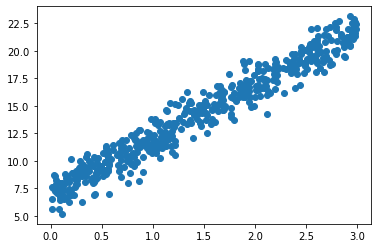

In [13]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [15]:
X_b = np.c_[np.ones((500,1)), x]

In [16]:
print(type(X_b), X_b.shape, X_b.ndim)

<class 'numpy.ndarray'> (500, 2) 2


In [17]:
print(X_b[:3])

[[1.         0.88767646]
 [1.         0.5630536 ]
 [1.         1.48564451]]


In [18]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [19]:
print(type(theta_best))

<class 'numpy.ndarray'>


In [20]:
print(theta_best)

[[7.05736513]
 [4.93198819]]


In [21]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
print(X_new_b)

[[1. 0.]
 [1. 2.]]


In [22]:
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 7.05736513]
 [16.92134152]]


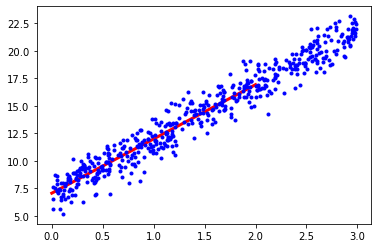

In [24]:
plt.plot(X_new,y_predict, "r-", linewidth = 3)
plt.plot(x,y,"b.")
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_b, y)

LinearRegression()

In [27]:
from sklearn.metrics import mean_squared_error

In [33]:
eta = 0.1
n_iterations = 1000
m = 500

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [36]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(x, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

/var/folders/_9/qq7pw_fx125c812gfv1wl_180000gn/T/ipykernel_32716/855948943.py:13: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


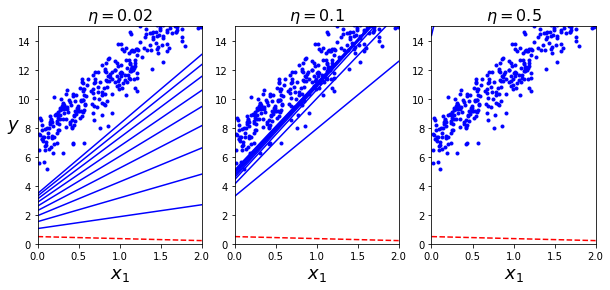

In [37]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [38]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

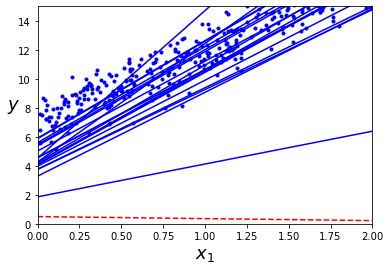

In [39]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(x, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()              

In [40]:
theta

array([[7.0684717 ],
       [4.92492194]])

Explanation:

    Didn't get to finish this part in time!